In [1]:
import numpy as np
import matplotlib.pyplot as plt

We simulate reactions $A\xrightarrow{\lambda_1} B$ and $B\xrightarrow{\lambda_{-1}(t)} A$ where $\lambda_{-1}(t)=p_b\sum_k \delta(t-t_k)$

In [2]:
#obtaining pb constant from MCell simulation
N_avo=6.0221409e23
delta_t=1e-8  #s
D_Ca = 2.2e-10 #m^2/s
sensor_area=3.625693809347724e-15 #m^2
pb_constant=1e-3/(N_avo*sensor_area)*np.sqrt(np.pi*delta_t/D_Ca)

final_time=0.13
infinite_time=10

In [3]:
def cum_pb(hit_times,pb):
    prob=[pb]
    for i in range(len(hit_times)):
        prob.append(prob[-1]*(1-pb))
    cum=np.cumsum(prob)
    cum=np.concatenate((cum,np.ones(1)))
    return cum

In [77]:
def gen_tau(hit_times,r,pb):
    cum=cum_pb(hit_times,pb)
    #print(cum.shape,cum[-1])
    ind=np.searchsorted(cum,r)
    if ind==len(hit_times)+1:
        return infinite_time
    return hit_times[ind]

In [181]:
def new_gen_tau(t,hit_times,r,pb):
    H=len(hit_times)
    #pbs=np.ones(H)*pb-np.arange(H)*pb**2
    pbs=pb*np.exp(-np.arange(H)*pb)
    cum=np.clip(np.cumsum(pbs),0,1)
    if cum[-1]<1:
        cum=np.concatenate((cum,[1]))
    #print(cum.shape,cum[-1])
    #return np.random.choice(np.concatenate((hit_times,[infinite_time])),p=pbs)
    
    ind=np.searchsorted(cum,r)
    #print(H)
    if ind==H:
        return infinite_time
    return t+hit_times[ind]

In [193]:
hit_times=np.sort(np.genfromtxt("ca_hits.dat").T[0])
l1=1e2
l2=0.612e8*5

R=np.array([[-1,1],[1,-1]])

In [194]:
t=0
x=np.array([5,5])
r=np.random.rand(2)
tau[0]=-1/(l1*x[0])*np.log(r[0])
tau[1]=new_gen_tau(t,hit_times,r[1],pb_constant*l2*x[1])
while(t<final_time):
    min_ind=np.argmin(tau)

    t=tau[min_ind]
    
    reac=np.zeros(2)
    reac[min_ind]=1
    x=x+np.dot(R,reac)
    print("x:",x)
    r=np.random.rand(2)
    
    if not x[0]==0:
        tau[0]=t-1/(l1*x[0])*np.log(r[0])
    else:
        tau[0]=infinite_time
    hit_times=hit_times[np.where(hit_times>t)]
    if len(hit_times)>0:
        tau[1]=new_gen_tau(t,hit_times,r[1],pb_constant*l2*x[1])
    else:
        if x[0]==0:
            break
        
    print(tau)

x: [4. 6.]
[0.00457323 0.00303684]
x: [5. 5.]
[0.00456182 0.00626184]
x: [4. 6.]
[0.01013421 0.00935682]
x: [5. 5.]
[0.01389576 0.03579182]
x: [4. 6.]
[0.01461475 0.03241676]
x: [3. 7.]
[0.0169357  0.03237775]
x: [2. 8.]
[0.02381592 0.0346537 ]
x: [1. 9.]
[0.02927977 0.04838092]
x: [ 0. 10.]
[10.          0.06600377]
x: [1. 9.]
[0.10485795 0.13555977]
x: [ 0. 10.]
[10.          0.21115495]
x: [1. 9.]
[0.21625661 0.21115495]
x: [2. 8.]
[0.21947971 0.21115495]
x: [3. 7.]
[0.21435786 0.21115495]
x: [4. 6.]
[0.21622908 0.21115495]
x: [5. 5.]
[0.2123702  0.21115495]
x: [6. 4.]
[0.21205369 0.21115495]
x: [7. 3.]
[0.21383683 0.21115495]
x: [8. 2.]
[0.21227743 0.21115495]
x: [9. 1.]
[0.21133744 0.21115495]
x: [10.  0.]
[0.21152113 0.21115495]
x: [11. -1.]
[0.21132854 0.21115495]
x: [12. -2.]
[0.21276499 0.21115495]
x: [13. -3.]
[0.21206994 0.21115495]
x: [14. -4.]
[0.2114323  0.21115495]
x: [15. -5.]
[0.21129509 0.21115495]
x: [16. -6.]
[0.21303856 0.21115495]
x: [17. -7.]
[0.21148468 0.211154

x: [ 290. -280.]
[0.21118402 0.21115495]
x: [ 291. -281.]
[0.21119952 0.21115495]
x: [ 292. -282.]
[0.2111674  0.21115495]
x: [ 293. -283.]
[0.2111573  0.21115495]
x: [ 294. -284.]
[0.21119069 0.21115495]
x: [ 295. -285.]
[0.21118202 0.21115495]
x: [ 296. -286.]
[0.21116072 0.21115495]
x: [ 297. -287.]
[0.21115855 0.21115495]
x: [ 298. -288.]
[0.21130937 0.21115495]
x: [ 299. -289.]
[0.21116116 0.21115495]
x: [ 300. -290.]
[0.21115718 0.21115495]
x: [ 301. -291.]
[0.21117107 0.21115495]
x: [ 302. -292.]
[0.21121056 0.21115495]
x: [ 303. -293.]
[0.21117268 0.21115495]
x: [ 304. -294.]
[0.21116616 0.21115495]
x: [ 305. -295.]
[0.21117299 0.21115495]
x: [ 306. -296.]
[0.21116104 0.21115495]
x: [ 307. -297.]
[0.21118206 0.21115495]
x: [ 308. -298.]
[0.21118862 0.21115495]
x: [ 309. -299.]
[0.21116415 0.21115495]
x: [ 310. -300.]
[0.21115993 0.21115495]
x: [ 311. -301.]
[0.21117179 0.21115495]
x: [ 312. -302.]
[0.21116337 0.21115495]
x: [ 313. -303.]
[0.21115885 0.21115495]
x: [ 314. -304.]

x: [ 581. -571.]
[0.21117894 0.21115495]
x: [ 582. -572.]
[0.21116632 0.21115495]
x: [ 583. -573.]
[0.21115738 0.21115495]
x: [ 584. -574.]
[0.2111556  0.21115495]
x: [ 585. -575.]
[0.21116261 0.21115495]
x: [ 586. -576.]
[0.21122123 0.21115495]
x: [ 587. -577.]
[0.21118097 0.21115495]
x: [ 588. -578.]
[0.21115916 0.21115495]
x: [ 589. -579.]
[0.21116197 0.21115495]
x: [ 590. -580.]
[0.21116152 0.21115495]
x: [ 591. -581.]
[0.21115656 0.21115495]
x: [ 592. -582.]
[0.21116252 0.21115495]
x: [ 593. -583.]
[0.21116192 0.21115495]
x: [ 594. -584.]
[0.2111593  0.21115495]
x: [ 595. -585.]
[0.21116664 0.21115495]
x: [ 596. -586.]
[0.2111664  0.21115495]
x: [ 597. -587.]
[0.21115563 0.21115495]
x: [ 598. -588.]
[0.2111925  0.21115495]
x: [ 599. -589.]
[0.21116341 0.21115495]
x: [ 600. -590.]
[0.21122761 0.21115495]
x: [ 601. -591.]
[0.21118084 0.21115495]
x: [ 602. -592.]
[0.21116625 0.21115495]
x: [ 603. -593.]
[0.21115637 0.21115495]
x: [ 604. -594.]
[0.21115806 0.21115495]
x: [ 605. -595.]

x: [ 886. -876.]
[0.21117961 0.21115495]
x: [ 887. -877.]
[0.21115551 0.21115495]
x: [ 888. -878.]
[0.21115866 0.21115495]
x: [ 889. -879.]
[0.21116845 0.21115495]
x: [ 890. -880.]
[0.21116079 0.21115495]
x: [ 891. -881.]
[0.21115556 0.21115495]
x: [ 892. -882.]
[0.21117147 0.21115495]
x: [ 893. -883.]
[0.21116029 0.21115495]
x: [ 894. -884.]
[0.21119611 0.21115495]
x: [ 895. -885.]
[0.21115755 0.21115495]
x: [ 896. -886.]
[0.21116272 0.21115495]
x: [ 897. -887.]
[0.2111609  0.21115495]
x: [ 898. -888.]
[0.21117066 0.21115495]
x: [ 899. -889.]
[0.21115754 0.21115495]
x: [ 900. -890.]
[0.21116093 0.21115495]
x: [ 901. -891.]
[0.21118707 0.21115495]
x: [ 902. -892.]
[0.21115551 0.21115495]
x: [ 903. -893.]
[0.21116417 0.21115495]
x: [ 904. -894.]
[0.21116272 0.21115495]
x: [ 905. -895.]
[0.21115676 0.21115495]
x: [ 906. -896.]
[0.21117601 0.21115495]
x: [ 907. -897.]
[0.21116939 0.21115495]
x: [ 908. -898.]
[0.2111624  0.21115495]
x: [ 909. -899.]
[0.21116049 0.21115495]
x: [ 910. -900.]

[0.21115551 0.21115495]
x: [ 1195. -1185.]
[0.21117461 0.21115495]
x: [ 1196. -1186.]
[0.21116534 0.21115495]
x: [ 1197. -1187.]
[0.21115798 0.21115495]
x: [ 1198. -1188.]
[0.2111555  0.21115495]
x: [ 1199. -1189.]
[0.21116089 0.21115495]
x: [ 1200. -1190.]
[0.2111558  0.21115495]
x: [ 1201. -1191.]
[0.2111608  0.21115495]
x: [ 1202. -1192.]
[0.21116338 0.21115495]
x: [ 1203. -1193.]
[0.21116265 0.21115495]
x: [ 1204. -1194.]
[0.21115531 0.21115495]
x: [ 1205. -1195.]
[0.21117094 0.21115495]
x: [ 1206. -1196.]
[0.21115663 0.21115495]
x: [ 1207. -1197.]
[0.21116965 0.21115495]
x: [ 1208. -1198.]
[0.21116231 0.21115495]
x: [ 1209. -1199.]
[0.21116343 0.21115495]
x: [ 1210. -1200.]
[0.21115711 0.21115495]
x: [ 1211. -1201.]
[0.21115502 0.21115495]
x: [ 1212. -1202.]
[0.21116713 0.21115495]
x: [ 1213. -1203.]
[0.2111565  0.21115495]
x: [ 1214. -1204.]
[0.21115747 0.21115495]
x: [ 1215. -1205.]
[0.21115979 0.21115495]
x: [ 1216. -1206.]
[0.2111669  0.21115495]
x: [ 1217. -1207.]
[0.21117276

[0.21116502 0.21115495]
x: [ 1515. -1505.]
[0.21115563 0.21115495]
x: [ 1516. -1506.]
[0.21116124 0.21115495]
x: [ 1517. -1507.]
[0.21117795 0.21115495]
x: [ 1518. -1508.]
[0.2111576  0.21115495]
x: [ 1519. -1509.]
[0.21115649 0.21115495]
x: [ 1520. -1510.]
[0.21117527 0.21115495]
x: [ 1521. -1511.]
[0.21115666 0.21115495]
x: [ 1522. -1512.]
[0.21115636 0.21115495]
x: [ 1523. -1513.]
[0.21116915 0.21115495]
x: [ 1524. -1514.]
[0.2111561  0.21115495]
x: [ 1525. -1515.]
[0.21116289 0.21115495]
x: [ 1526. -1516.]
[0.21116109 0.21115495]
x: [ 1527. -1517.]
[0.21115825 0.21115495]
x: [ 1528. -1518.]
[0.211164   0.21115495]
x: [ 1529. -1519.]
[0.21115548 0.21115495]
x: [ 1530. -1520.]
[0.21115949 0.21115495]
x: [ 1531. -1521.]
[0.21115554 0.21115495]
x: [ 1532. -1522.]
[0.21115744 0.21115495]
x: [ 1533. -1523.]
[0.21115626 0.21115495]
x: [ 1534. -1524.]
[0.21115725 0.21115495]
x: [ 1535. -1525.]
[0.2111612  0.21115495]
x: [ 1536. -1526.]
[0.21116144 0.21115495]
x: [ 1537. -1527.]
[0.21115768

x: [ 1814. -1804.]
[0.21115529 0.21115495]
x: [ 1815. -1805.]
[0.21115986 0.21115495]
x: [ 1816. -1806.]
[0.21116368 0.21115495]
x: [ 1817. -1807.]
[0.21115957 0.21115495]
x: [ 1818. -1808.]
[0.21115754 0.21115495]
x: [ 1819. -1809.]
[0.21116332 0.21115495]
x: [ 1820. -1810.]
[0.21115841 0.21115495]
x: [ 1821. -1811.]
[0.21115638 0.21115495]
x: [ 1822. -1812.]
[0.21116763 0.21115495]
x: [ 1823. -1813.]
[0.21115777 0.21115495]
x: [ 1824. -1814.]
[0.21115633 0.21115495]
x: [ 1825. -1815.]
[0.21116116 0.21115495]
x: [ 1826. -1816.]
[0.21115749 0.21115495]
x: [ 1827. -1817.]
[0.21115753 0.21115495]
x: [ 1828. -1818.]
[0.21115712 0.21115495]
x: [ 1829. -1819.]
[0.21116675 0.21115495]
x: [ 1830. -1820.]
[0.21115776 0.21115495]
x: [ 1831. -1821.]
[0.21115629 0.21115495]
x: [ 1832. -1822.]
[0.21115518 0.21115495]
x: [ 1833. -1823.]
[0.21115748 0.21115495]
x: [ 1834. -1824.]
[0.21115919 0.21115495]
x: [ 1835. -1825.]
[0.21116644 0.21115495]
x: [ 1836. -1826.]
[0.21116502 0.21115495]
x: [ 1837. 

x: [ 2108. -2098.]
[0.2111593  0.21115495]
x: [ 2109. -2099.]
[0.21115608 0.21115495]
x: [ 2110. -2100.]
[0.21116547 0.21115495]
x: [ 2111. -2101.]
[0.21117323 0.21115495]
x: [ 2112. -2102.]
[0.21115628 0.21115495]
x: [ 2113. -2103.]
[0.21115844 0.21115495]
x: [ 2114. -2104.]
[0.21115926 0.21115495]
x: [ 2115. -2105.]
[0.2111593  0.21115495]
x: [ 2116. -2106.]
[0.21115499 0.21115495]
x: [ 2117. -2107.]
[0.21116248 0.21115495]
x: [ 2118. -2108.]
[0.21115566 0.21115495]
x: [ 2119. -2109.]
[0.21115624 0.21115495]
x: [ 2120. -2110.]
[0.21115548 0.21115495]
x: [ 2121. -2111.]
[0.21116667 0.21115495]
x: [ 2122. -2112.]
[0.21115877 0.21115495]
x: [ 2123. -2113.]
[0.21116    0.21115495]
x: [ 2124. -2114.]
[0.21116204 0.21115495]
x: [ 2125. -2115.]
[0.21116204 0.21115495]
x: [ 2126. -2116.]
[0.2111556  0.21115495]
x: [ 2127. -2117.]
[0.21115857 0.21115495]
x: [ 2128. -2118.]
[0.21115819 0.21115495]
x: [ 2129. -2119.]
[0.211157   0.21115495]
x: [ 2130. -2120.]
[0.21115588 0.21115495]
x: [ 2131. 

x: [ 2421. -2411.]
[0.21116117 0.21115495]
x: [ 2422. -2412.]
[0.2111555  0.21115495]
x: [ 2423. -2413.]
[0.21115588 0.21115495]
x: [ 2424. -2414.]
[0.21115928 0.21115495]
x: [ 2425. -2415.]
[0.21117301 0.21115495]
x: [ 2426. -2416.]
[0.21115831 0.21115495]
x: [ 2427. -2417.]
[0.21115821 0.21115495]
x: [ 2428. -2418.]
[0.21115725 0.21115495]
x: [ 2429. -2419.]
[0.21115752 0.21115495]
x: [ 2430. -2420.]
[0.21115498 0.21115495]
x: [ 2431. -2421.]
[0.2111575  0.21115495]
x: [ 2432. -2422.]
[0.21115822 0.21115495]
x: [ 2433. -2423.]
[0.21115851 0.21115495]
x: [ 2434. -2424.]
[0.21116626 0.21115495]
x: [ 2435. -2425.]
[0.21115759 0.21115495]
x: [ 2436. -2426.]
[0.21115545 0.21115495]
x: [ 2437. -2427.]
[0.21115866 0.21115495]
x: [ 2438. -2428.]
[0.21115793 0.21115495]
x: [ 2439. -2429.]
[0.2111568  0.21115495]
x: [ 2440. -2430.]
[0.2111605  0.21115495]
x: [ 2441. -2431.]
[0.21116645 0.21115495]
x: [ 2442. -2432.]
[0.21116493 0.21115495]
x: [ 2443. -2433.]
[0.21115947 0.21115495]
x: [ 2444. 

x: [ 2731. -2721.]
[0.21115769 0.21115495]
x: [ 2732. -2722.]
[0.21116065 0.21115495]
x: [ 2733. -2723.]
[0.211156   0.21115495]
x: [ 2734. -2724.]
[0.2111563  0.21115495]
x: [ 2735. -2725.]
[0.2111565  0.21115495]
x: [ 2736. -2726.]
[0.21115516 0.21115495]
x: [ 2737. -2727.]
[0.21117414 0.21115495]
x: [ 2738. -2728.]
[0.21116078 0.21115495]
x: [ 2739. -2729.]
[0.21115666 0.21115495]
x: [ 2740. -2730.]
[0.21116182 0.21115495]
x: [ 2741. -2731.]
[0.21116262 0.21115495]
x: [ 2742. -2732.]
[0.211158   0.21115495]
x: [ 2743. -2733.]
[0.21116067 0.21115495]
x: [ 2744. -2734.]
[0.21115889 0.21115495]
x: [ 2745. -2735.]
[0.21115581 0.21115495]
x: [ 2746. -2736.]
[0.21116764 0.21115495]
x: [ 2747. -2737.]
[0.21115692 0.21115495]
x: [ 2748. -2738.]
[0.21115514 0.21115495]
x: [ 2749. -2739.]
[0.21115539 0.21115495]
x: [ 2750. -2740.]
[0.21115513 0.21115495]
x: [ 2751. -2741.]
[0.21115515 0.21115495]
x: [ 2752. -2742.]
[0.21115934 0.21115495]
x: [ 2753. -2743.]
[0.21115721 0.21115495]
x: [ 2754. 

[0.21115523 0.21115495]
x: [ 3010. -3000.]
[0.21115696 0.21115495]
x: [ 3011. -3001.]
[0.21115729 0.21115495]
x: [ 3012. -3002.]
[0.21116344 0.21115495]
x: [ 3013. -3003.]
[0.21115524 0.21115495]
x: [ 3014. -3004.]
[0.21115502 0.21115495]
x: [ 3015. -3005.]
[0.21115585 0.21115495]
x: [ 3016. -3006.]
[0.21116318 0.21115495]
x: [ 3017. -3007.]
[0.2111573  0.21115495]
x: [ 3018. -3008.]
[0.21115556 0.21115495]
x: [ 3019. -3009.]
[0.21116043 0.21115495]
x: [ 3020. -3010.]
[0.21115577 0.21115495]
x: [ 3021. -3011.]
[0.21115584 0.21115495]
x: [ 3022. -3012.]
[0.21115747 0.21115495]
x: [ 3023. -3013.]
[0.21115696 0.21115495]
x: [ 3024. -3014.]
[0.21115536 0.21115495]
x: [ 3025. -3015.]
[0.21115765 0.21115495]
x: [ 3026. -3016.]
[0.21116356 0.21115495]
x: [ 3027. -3017.]
[0.21115522 0.21115495]
x: [ 3028. -3018.]
[0.21115821 0.21115495]
x: [ 3029. -3019.]
[0.21116146 0.21115495]
x: [ 3030. -3020.]
[0.21116167 0.21115495]
x: [ 3031. -3021.]
[0.21115502 0.21115495]
x: [ 3032. -3022.]
[0.21115692

x: [ 3318. -3308.]
[0.21115842 0.21115495]
x: [ 3319. -3309.]
[0.21116253 0.21115495]
x: [ 3320. -3310.]
[0.21115508 0.21115495]
x: [ 3321. -3311.]
[0.21115814 0.21115495]
x: [ 3322. -3312.]
[0.21115658 0.21115495]
x: [ 3323. -3313.]
[0.21115656 0.21115495]
x: [ 3324. -3314.]
[0.21115589 0.21115495]
x: [ 3325. -3315.]
[0.21115534 0.21115495]
x: [ 3326. -3316.]
[0.21115607 0.21115495]
x: [ 3327. -3317.]
[0.21115678 0.21115495]
x: [ 3328. -3318.]
[0.21115853 0.21115495]
x: [ 3329. -3319.]
[0.21115737 0.21115495]
x: [ 3330. -3320.]
[0.21115608 0.21115495]
x: [ 3331. -3321.]
[0.2111564  0.21115495]
x: [ 3332. -3322.]
[0.21115629 0.21115495]
x: [ 3333. -3323.]
[0.21116339 0.21115495]
x: [ 3334. -3324.]
[0.21115543 0.21115495]
x: [ 3335. -3325.]
[0.21115995 0.21115495]
x: [ 3336. -3326.]
[0.21115657 0.21115495]
x: [ 3337. -3327.]
[0.21115632 0.21115495]
x: [ 3338. -3328.]
[0.21115739 0.21115495]
x: [ 3339. -3329.]
[0.21116025 0.21115495]
x: [ 3340. -3330.]
[0.21116887 0.21115495]
x: [ 3341. 

[0.21115681 0.21115495]
x: [ 3580. -3570.]
[0.21115655 0.21115495]
x: [ 3581. -3571.]
[0.21115686 0.21115495]
x: [ 3582. -3572.]
[0.21115669 0.21115495]
x: [ 3583. -3573.]
[0.2111616  0.21115495]
x: [ 3584. -3574.]
[0.21115541 0.21115495]
x: [ 3585. -3575.]
[0.2111552  0.21115495]
x: [ 3586. -3576.]
[0.21115967 0.21115495]
x: [ 3587. -3577.]
[0.21116071 0.21115495]
x: [ 3588. -3578.]
[0.21115646 0.21115495]
x: [ 3589. -3579.]
[0.21117027 0.21115495]
x: [ 3590. -3580.]
[0.2111561  0.21115495]
x: [ 3591. -3581.]
[0.21116028 0.21115495]
x: [ 3592. -3582.]
[0.21115594 0.21115495]
x: [ 3593. -3583.]
[0.21115617 0.21115495]
x: [ 3594. -3584.]
[0.21115522 0.21115495]
x: [ 3595. -3585.]
[0.2111559  0.21115495]
x: [ 3596. -3586.]
[0.21115654 0.21115495]
x: [ 3597. -3587.]
[0.21115667 0.21115495]
x: [ 3598. -3588.]
[0.21115506 0.21115495]
x: [ 3599. -3589.]
[0.21115508 0.21115495]
x: [ 3600. -3590.]
[0.21115644 0.21115495]
x: [ 3601. -3591.]
[0.21115603 0.21115495]
x: [ 3602. -3592.]
[0.21115708

[0.21115571 0.21115495]
x: [ 3857. -3847.]
[0.21115782 0.21115495]
x: [ 3858. -3848.]
[0.21115568 0.21115495]
x: [ 3859. -3849.]
[0.21115732 0.21115495]
x: [ 3860. -3850.]
[0.21115884 0.21115495]
x: [ 3861. -3851.]
[0.21115563 0.21115495]
x: [ 3862. -3852.]
[0.21116011 0.21115495]
x: [ 3863. -3853.]
[0.21116543 0.21115495]
x: [ 3864. -3854.]
[0.21115545 0.21115495]
x: [ 3865. -3855.]
[0.21115575 0.21115495]
x: [ 3866. -3856.]
[0.21115511 0.21115495]
x: [ 3867. -3857.]
[0.21116218 0.21115495]
x: [ 3868. -3858.]
[0.21115543 0.21115495]
x: [ 3869. -3859.]
[0.21115939 0.21115495]
x: [ 3870. -3860.]
[0.21115556 0.21115495]
x: [ 3871. -3861.]
[0.21115673 0.21115495]
x: [ 3872. -3862.]
[0.21115722 0.21115495]
x: [ 3873. -3863.]
[0.21115543 0.21115495]
x: [ 3874. -3864.]
[0.21115701 0.21115495]
x: [ 3875. -3865.]
[0.21115892 0.21115495]
x: [ 3876. -3866.]
[0.21115625 0.21115495]
x: [ 3877. -3867.]
[0.21116335 0.21115495]
x: [ 3878. -3868.]
[0.21116186 0.21115495]
x: [ 3879. -3869.]
[0.2111553 

x: [ 4171. -4161.]
[0.21115757 0.21115495]
x: [ 4172. -4162.]
[0.21115651 0.21115495]
x: [ 4173. -4163.]
[0.21115698 0.21115495]
x: [ 4174. -4164.]
[0.211158   0.21115495]
x: [ 4175. -4165.]
[0.21115564 0.21115495]
x: [ 4176. -4166.]
[0.21115555 0.21115495]
x: [ 4177. -4167.]
[0.21115533 0.21115495]
x: [ 4178. -4168.]
[0.21115634 0.21115495]
x: [ 4179. -4169.]
[0.21115797 0.21115495]
x: [ 4180. -4170.]
[0.21115933 0.21115495]
x: [ 4181. -4171.]
[0.21115547 0.21115495]
x: [ 4182. -4172.]
[0.21115712 0.21115495]
x: [ 4183. -4173.]
[0.21115872 0.21115495]
x: [ 4184. -4174.]
[0.2111559  0.21115495]
x: [ 4185. -4175.]
[0.21115884 0.21115495]
x: [ 4186. -4176.]
[0.21115666 0.21115495]
x: [ 4187. -4177.]
[0.21115841 0.21115495]
x: [ 4188. -4178.]
[0.21115909 0.21115495]
x: [ 4189. -4179.]
[0.21115726 0.21115495]
x: [ 4190. -4180.]
[0.21115586 0.21115495]
x: [ 4191. -4181.]
[0.21115619 0.21115495]
x: [ 4192. -4182.]
[0.2111572  0.21115495]
x: [ 4193. -4183.]
[0.21115586 0.21115495]
x: [ 4194. 

x: [ 4464. -4454.]
[0.21115575 0.21115495]
x: [ 4465. -4455.]
[0.21115926 0.21115495]
x: [ 4466. -4456.]
[0.21115681 0.21115495]
x: [ 4467. -4457.]
[0.21115501 0.21115495]
x: [ 4468. -4458.]
[0.21116594 0.21115495]
x: [ 4469. -4459.]
[0.21115972 0.21115495]
x: [ 4470. -4460.]
[0.21116127 0.21115495]
x: [ 4471. -4461.]
[0.21115718 0.21115495]
x: [ 4472. -4462.]
[0.21115572 0.21115495]
x: [ 4473. -4463.]
[0.2111583  0.21115495]
x: [ 4474. -4464.]
[0.21115592 0.21115495]
x: [ 4475. -4465.]
[0.2111567  0.21115495]
x: [ 4476. -4466.]
[0.211157   0.21115495]
x: [ 4477. -4467.]
[0.21115571 0.21115495]
x: [ 4478. -4468.]
[0.21115515 0.21115495]
x: [ 4479. -4469.]
[0.21115962 0.21115495]
x: [ 4480. -4470.]
[0.21115714 0.21115495]
x: [ 4481. -4471.]
[0.21115531 0.21115495]
x: [ 4482. -4472.]
[0.21115742 0.21115495]
x: [ 4483. -4473.]
[0.21115804 0.21115495]
x: [ 4484. -4474.]
[0.21115654 0.21115495]
x: [ 4485. -4475.]
[0.21115816 0.21115495]
x: [ 4486. -4476.]
[0.21115498 0.21115495]
x: [ 4487. 

x: [ 4735. -4725.]
[0.2111592  0.21115495]
x: [ 4736. -4726.]
[0.21115734 0.21115495]
x: [ 4737. -4727.]
[0.21115576 0.21115495]
x: [ 4738. -4728.]
[0.21115612 0.21115495]
x: [ 4739. -4729.]
[0.21115721 0.21115495]
x: [ 4740. -4730.]
[0.21115614 0.21115495]
x: [ 4741. -4731.]
[0.21115581 0.21115495]
x: [ 4742. -4732.]
[0.2111569  0.21115495]
x: [ 4743. -4733.]
[0.21115509 0.21115495]
x: [ 4744. -4734.]
[0.21115513 0.21115495]
x: [ 4745. -4735.]
[0.21115564 0.21115495]
x: [ 4746. -4736.]
[0.21115514 0.21115495]
x: [ 4747. -4737.]
[0.21115793 0.21115495]
x: [ 4748. -4738.]
[0.21115514 0.21115495]
x: [ 4749. -4739.]
[0.2111556  0.21115495]
x: [ 4750. -4740.]
[0.21115638 0.21115495]
x: [ 4751. -4741.]
[0.21116679 0.21115495]
x: [ 4752. -4742.]
[0.21115537 0.21115495]
x: [ 4753. -4743.]
[0.21115691 0.21115495]
x: [ 4754. -4744.]
[0.21115557 0.21115495]
x: [ 4755. -4745.]
[0.21116026 0.21115495]
x: [ 4756. -4746.]
[0.2111589  0.21115495]
x: [ 4757. -4747.]
[0.21115671 0.21115495]
x: [ 4758. 

[0.21115531 0.21115495]
x: [ 5002. -4992.]
[0.21115663 0.21115495]
x: [ 5003. -4993.]
[0.21115581 0.21115495]
x: [ 5004. -4994.]
[0.21115651 0.21115495]
x: [ 5005. -4995.]
[0.211155   0.21115495]
x: [ 5006. -4996.]
[0.21115542 0.21115495]
x: [ 5007. -4997.]
[0.21115796 0.21115495]
x: [ 5008. -4998.]
[0.21115657 0.21115495]
x: [ 5009. -4999.]
[0.21115545 0.21115495]
x: [ 5010. -5000.]
[0.2111586  0.21115495]
x: [ 5011. -5001.]
[0.211157   0.21115495]
x: [ 5012. -5002.]
[0.21115619 0.21115495]
x: [ 5013. -5003.]
[0.21115571 0.21115495]
x: [ 5014. -5004.]
[0.21115659 0.21115495]
x: [ 5015. -5005.]
[0.21115658 0.21115495]
x: [ 5016. -5006.]
[0.21115506 0.21115495]
x: [ 5017. -5007.]
[0.21115555 0.21115495]
x: [ 5018. -5008.]
[0.21115563 0.21115495]
x: [ 5019. -5009.]
[0.21115676 0.21115495]
x: [ 5020. -5010.]
[0.21115875 0.21115495]
x: [ 5021. -5011.]
[0.21115687 0.21115495]
x: [ 5022. -5012.]
[0.21115696 0.21115495]
x: [ 5023. -5013.]
[0.21115553 0.21115495]
x: [ 5024. -5014.]
[0.21116368

x: [ 5284. -5274.]
[0.21115563 0.21115495]
x: [ 5285. -5275.]
[0.21116083 0.21115495]
x: [ 5286. -5276.]
[0.21115752 0.21115495]
x: [ 5287. -5277.]
[0.2111577  0.21115495]
x: [ 5288. -5278.]
[0.21115524 0.21115495]
x: [ 5289. -5279.]
[0.21115589 0.21115495]
x: [ 5290. -5280.]
[0.21115499 0.21115495]
x: [ 5291. -5281.]
[0.21115734 0.21115495]
x: [ 5292. -5282.]
[0.21115711 0.21115495]
x: [ 5293. -5283.]
[0.21115817 0.21115495]
x: [ 5294. -5284.]
[0.21115679 0.21115495]
x: [ 5295. -5285.]
[0.21115573 0.21115495]
x: [ 5296. -5286.]
[0.21115547 0.21115495]
x: [ 5297. -5287.]
[0.21115556 0.21115495]
x: [ 5298. -5288.]
[0.21115543 0.21115495]
x: [ 5299. -5289.]
[0.21115628 0.21115495]
x: [ 5300. -5290.]
[0.21115876 0.21115495]
x: [ 5301. -5291.]
[0.21116256 0.21115495]
x: [ 5302. -5292.]
[0.21115522 0.21115495]
x: [ 5303. -5293.]
[0.21115524 0.21115495]
x: [ 5304. -5294.]
[0.21115754 0.21115495]
x: [ 5305. -5295.]
[0.21115876 0.21115495]
x: [ 5306. -5296.]
[0.21115617 0.21115495]
x: [ 5307. 

x: [ 5563. -5553.]
[0.21115574 0.21115495]
x: [ 5564. -5554.]
[0.2111567  0.21115495]
x: [ 5565. -5555.]
[0.21115559 0.21115495]
x: [ 5566. -5556.]
[0.21115584 0.21115495]
x: [ 5567. -5557.]
[0.21115597 0.21115495]
x: [ 5568. -5558.]
[0.21115508 0.21115495]
x: [ 5569. -5559.]
[0.21115825 0.21115495]
x: [ 5570. -5560.]
[0.21115518 0.21115495]
x: [ 5571. -5561.]
[0.21115721 0.21115495]
x: [ 5572. -5562.]
[0.2111606  0.21115495]
x: [ 5573. -5563.]
[0.2111561  0.21115495]
x: [ 5574. -5564.]
[0.21115839 0.21115495]
x: [ 5575. -5565.]
[0.21115563 0.21115495]
x: [ 5576. -5566.]
[0.21115678 0.21115495]
x: [ 5577. -5567.]
[0.2111554  0.21115495]
x: [ 5578. -5568.]
[0.21115628 0.21115495]
x: [ 5579. -5569.]
[0.21115678 0.21115495]
x: [ 5580. -5570.]
[0.21115843 0.21115495]
x: [ 5581. -5571.]
[0.21115697 0.21115495]
x: [ 5582. -5572.]
[0.21115497 0.21115495]
x: [ 5583. -5573.]
[0.2111558  0.21115495]
x: [ 5584. -5574.]
[0.21115523 0.21115495]
x: [ 5585. -5575.]
[0.21115514 0.21115495]
x: [ 5586. 

[0.21115541 0.21115495]
x: [ 5834. -5824.]
[0.21115821 0.21115495]
x: [ 5835. -5825.]
[0.21115842 0.21115495]
x: [ 5836. -5826.]
[0.2111557  0.21115495]
x: [ 5837. -5827.]
[0.21115698 0.21115495]
x: [ 5838. -5828.]
[0.21115536 0.21115495]
x: [ 5839. -5829.]
[0.21115575 0.21115495]
x: [ 5840. -5830.]
[0.21115529 0.21115495]
x: [ 5841. -5831.]
[0.21115547 0.21115495]
x: [ 5842. -5832.]
[0.21115622 0.21115495]
x: [ 5843. -5833.]
[0.21115629 0.21115495]
x: [ 5844. -5834.]
[0.21115576 0.21115495]
x: [ 5845. -5835.]
[0.21115845 0.21115495]
x: [ 5846. -5836.]
[0.21115689 0.21115495]
x: [ 5847. -5837.]
[0.21115812 0.21115495]
x: [ 5848. -5838.]
[0.21115783 0.21115495]
x: [ 5849. -5839.]
[0.21115521 0.21115495]
x: [ 5850. -5840.]
[0.21115515 0.21115495]
x: [ 5851. -5841.]
[0.2111562  0.21115495]
x: [ 5852. -5842.]
[0.21115536 0.21115495]
x: [ 5853. -5843.]
[0.2111553  0.21115495]
x: [ 5854. -5844.]
[0.21116147 0.21115495]
x: [ 5855. -5845.]
[0.21115518 0.21115495]
x: [ 5856. -5846.]
[0.21115869

[0.21115517 0.21115495]
x: [ 6142. -6132.]
[0.21115547 0.21115495]
x: [ 6143. -6133.]
[0.21115625 0.21115495]
x: [ 6144. -6134.]
[0.21115574 0.21115495]
x: [ 6145. -6135.]
[0.211156   0.21115495]
x: [ 6146. -6136.]
[0.21115732 0.21115495]
x: [ 6147. -6137.]
[0.21115604 0.21115495]
x: [ 6148. -6138.]
[0.21115515 0.21115495]
x: [ 6149. -6139.]
[0.21115514 0.21115495]
x: [ 6150. -6140.]
[0.21115532 0.21115495]
x: [ 6151. -6141.]
[0.21115542 0.21115495]
x: [ 6152. -6142.]
[0.21116113 0.21115495]
x: [ 6153. -6143.]
[0.21115591 0.21115495]
x: [ 6154. -6144.]
[0.21115553 0.21115495]
x: [ 6155. -6145.]
[0.2111566  0.21115495]
x: [ 6156. -6146.]
[0.21116341 0.21115495]
x: [ 6157. -6147.]
[0.21115646 0.21115495]
x: [ 6158. -6148.]
[0.21115673 0.21115495]
x: [ 6159. -6149.]
[0.21115605 0.21115495]
x: [ 6160. -6150.]
[0.21115628 0.21115495]
x: [ 6161. -6151.]
[0.21115779 0.21115495]
x: [ 6162. -6152.]
[0.21115933 0.21115495]
x: [ 6163. -6153.]
[0.21115497 0.21115495]
x: [ 6164. -6154.]
[0.21115521

x: [ 6430. -6420.]
[0.21115553 0.21115495]
x: [ 6431. -6421.]
[0.21115782 0.21115495]
x: [ 6432. -6422.]
[0.21115982 0.21115495]
x: [ 6433. -6423.]
[0.21115858 0.21115495]
x: [ 6434. -6424.]
[0.21115752 0.21115495]
x: [ 6435. -6425.]
[0.21115594 0.21115495]
x: [ 6436. -6426.]
[0.21115504 0.21115495]
x: [ 6437. -6427.]
[0.21115552 0.21115495]
x: [ 6438. -6428.]
[0.21115578 0.21115495]
x: [ 6439. -6429.]
[0.21115527 0.21115495]
x: [ 6440. -6430.]
[0.21115504 0.21115495]
x: [ 6441. -6431.]
[0.21115957 0.21115495]
x: [ 6442. -6432.]
[0.21115637 0.21115495]
x: [ 6443. -6433.]
[0.21115711 0.21115495]
x: [ 6444. -6434.]
[0.21115523 0.21115495]
x: [ 6445. -6435.]
[0.21115606 0.21115495]
x: [ 6446. -6436.]
[0.21115654 0.21115495]
x: [ 6447. -6437.]
[0.21115641 0.21115495]
x: [ 6448. -6438.]
[0.21115525 0.21115495]
x: [ 6449. -6439.]
[0.21115618 0.21115495]
x: [ 6450. -6440.]
[0.21115674 0.21115495]
x: [ 6451. -6441.]
[0.21115549 0.21115495]
x: [ 6452. -6442.]
[0.21115569 0.21115495]
x: [ 6453. 

[0.21115707 0.21115495]
x: [ 6719. -6709.]
[0.21115525 0.21115495]
x: [ 6720. -6710.]
[0.21115637 0.21115495]
x: [ 6721. -6711.]
[0.2111557  0.21115495]
x: [ 6722. -6712.]
[0.21115556 0.21115495]
x: [ 6723. -6713.]
[0.21115601 0.21115495]
x: [ 6724. -6714.]
[0.21115543 0.21115495]
x: [ 6725. -6715.]
[0.21115575 0.21115495]
x: [ 6726. -6716.]
[0.2111563  0.21115495]
x: [ 6727. -6717.]
[0.21115549 0.21115495]
x: [ 6728. -6718.]
[0.21115495 0.21115495]
x: [ 6729. -6719.]
[0.2111561  0.21115495]
x: [ 6730. -6720.]
[0.21115618 0.21115495]
x: [ 6731. -6721.]
[0.21115563 0.21115495]
x: [ 6732. -6722.]
[0.21115502 0.21115495]
x: [ 6733. -6723.]
[0.21115536 0.21115495]
x: [ 6734. -6724.]
[0.21115999 0.21115495]
x: [ 6735. -6725.]
[0.21115745 0.21115495]
x: [ 6736. -6726.]
[0.21115521 0.21115495]
x: [ 6737. -6727.]
[0.21115761 0.21115495]
x: [ 6738. -6728.]
[0.21115653 0.21115495]
x: [ 6739. -6729.]
[0.21115897 0.21115495]
x: [ 6740. -6730.]
[0.21115545 0.21115495]
x: [ 6741. -6731.]
[0.21115623

[0.21115599 0.21115495]
x: [ 7043. -7033.]
[0.21115541 0.21115495]
x: [ 7044. -7034.]
[0.21115633 0.21115495]
x: [ 7045. -7035.]
[0.21115536 0.21115495]
x: [ 7046. -7036.]
[0.21115629 0.21115495]
x: [ 7047. -7037.]
[0.21115556 0.21115495]
x: [ 7048. -7038.]
[0.21115746 0.21115495]
x: [ 7049. -7039.]
[0.21115757 0.21115495]
x: [ 7050. -7040.]
[0.21115742 0.21115495]
x: [ 7051. -7041.]
[0.21115832 0.21115495]
x: [ 7052. -7042.]
[0.21115647 0.21115495]
x: [ 7053. -7043.]
[0.21115523 0.21115495]
x: [ 7054. -7044.]
[0.21115516 0.21115495]
x: [ 7055. -7045.]
[0.21115561 0.21115495]
x: [ 7056. -7046.]
[0.21115528 0.21115495]
x: [ 7057. -7047.]
[0.21115672 0.21115495]
x: [ 7058. -7048.]
[0.21115748 0.21115495]
x: [ 7059. -7049.]
[0.21115744 0.21115495]
x: [ 7060. -7050.]
[0.21115624 0.21115495]
x: [ 7061. -7051.]
[0.21116022 0.21115495]
x: [ 7062. -7052.]
[0.21115522 0.21115495]
x: [ 7063. -7053.]
[0.21115699 0.21115495]
x: [ 7064. -7054.]
[0.21115818 0.21115495]
x: [ 7065. -7055.]
[0.21115513

x: [ 7345. -7335.]
[0.21115893 0.21115495]
x: [ 7346. -7336.]
[0.2111605  0.21115495]
x: [ 7347. -7337.]
[0.21115827 0.21115495]
x: [ 7348. -7338.]
[0.21115678 0.21115495]
x: [ 7349. -7339.]
[0.21115858 0.21115495]
x: [ 7350. -7340.]
[0.21115515 0.21115495]
x: [ 7351. -7341.]
[0.21115707 0.21115495]
x: [ 7352. -7342.]
[0.21115691 0.21115495]
x: [ 7353. -7343.]
[0.21115783 0.21115495]
x: [ 7354. -7344.]
[0.21115673 0.21115495]
x: [ 7355. -7345.]
[0.21115613 0.21115495]
x: [ 7356. -7346.]
[0.21115578 0.21115495]
x: [ 7357. -7347.]
[0.21115597 0.21115495]
x: [ 7358. -7348.]
[0.21115608 0.21115495]
x: [ 7359. -7349.]
[0.21115795 0.21115495]
x: [ 7360. -7350.]
[0.21115595 0.21115495]
x: [ 7361. -7351.]
[0.21115952 0.21115495]
x: [ 7362. -7352.]
[0.21115639 0.21115495]
x: [ 7363. -7353.]
[0.21115538 0.21115495]
x: [ 7364. -7354.]
[0.21115518 0.21115495]
x: [ 7365. -7355.]
[0.21115854 0.21115495]
x: [ 7366. -7356.]
[0.21115525 0.21115495]
x: [ 7367. -7357.]
[0.21115535 0.21115495]
x: [ 7368. 

x: [ 7644. -7634.]
[0.21115686 0.21115495]
x: [ 7645. -7635.]
[0.21115706 0.21115495]
x: [ 7646. -7636.]
[0.211155   0.21115495]
x: [ 7647. -7637.]
[0.2111564  0.21115495]
x: [ 7648. -7638.]
[0.21115496 0.21115495]
x: [ 7649. -7639.]
[0.21115881 0.21115495]
x: [ 7650. -7640.]
[0.21115551 0.21115495]
x: [ 7651. -7641.]
[0.21115507 0.21115495]
x: [ 7652. -7642.]
[0.21116021 0.21115495]
x: [ 7653. -7643.]
[0.21115502 0.21115495]
x: [ 7654. -7644.]
[0.21115675 0.21115495]
x: [ 7655. -7645.]
[0.21115532 0.21115495]
x: [ 7656. -7646.]
[0.21115516 0.21115495]
x: [ 7657. -7647.]
[0.2111555  0.21115495]
x: [ 7658. -7648.]
[0.21115582 0.21115495]
x: [ 7659. -7649.]
[0.21116087 0.21115495]
x: [ 7660. -7650.]
[0.21115503 0.21115495]
x: [ 7661. -7651.]
[0.21115693 0.21115495]
x: [ 7662. -7652.]
[0.21115498 0.21115495]
x: [ 7663. -7653.]
[0.21115718 0.21115495]
x: [ 7664. -7654.]
[0.21115665 0.21115495]
x: [ 7665. -7655.]
[0.2111558  0.21115495]
x: [ 7666. -7656.]
[0.21115544 0.21115495]
x: [ 7667. 

x: [ 7917. -7907.]
[0.21115567 0.21115495]
x: [ 7918. -7908.]
[0.21115507 0.21115495]
x: [ 7919. -7909.]
[0.21115751 0.21115495]
x: [ 7920. -7910.]
[0.21115601 0.21115495]
x: [ 7921. -7911.]
[0.21115621 0.21115495]
x: [ 7922. -7912.]
[0.21115527 0.21115495]
x: [ 7923. -7913.]
[0.21115772 0.21115495]
x: [ 7924. -7914.]
[0.21115513 0.21115495]
x: [ 7925. -7915.]
[0.21115595 0.21115495]
x: [ 7926. -7916.]
[0.21115642 0.21115495]
x: [ 7927. -7917.]
[0.21115573 0.21115495]
x: [ 7928. -7918.]
[0.21115566 0.21115495]
x: [ 7929. -7919.]
[0.21115554 0.21115495]
x: [ 7930. -7920.]
[0.21115497 0.21115495]
x: [ 7931. -7921.]
[0.21116042 0.21115495]
x: [ 7932. -7922.]
[0.21115496 0.21115495]
x: [ 7933. -7923.]
[0.21115515 0.21115495]
x: [ 7934. -7924.]
[0.21115517 0.21115495]
x: [ 7935. -7925.]
[0.21115533 0.21115495]
x: [ 7936. -7926.]
[0.21115755 0.21115495]
x: [ 7937. -7927.]
[0.21115767 0.21115495]
x: [ 7938. -7928.]
[0.211156   0.21115495]
x: [ 7939. -7929.]
[0.21115575 0.21115495]
x: [ 7940. 

x: [ 8186. -8176.]
[0.21115509 0.21115495]
x: [ 8187. -8177.]
[0.21115709 0.21115495]
x: [ 8188. -8178.]
[0.21115723 0.21115495]
x: [ 8189. -8179.]
[0.211156   0.21115495]
x: [ 8190. -8180.]
[0.21115756 0.21115495]
x: [ 8191. -8181.]
[0.21115548 0.21115495]
x: [ 8192. -8182.]
[0.21115588 0.21115495]
x: [ 8193. -8183.]
[0.21115526 0.21115495]
x: [ 8194. -8184.]
[0.21115525 0.21115495]
x: [ 8195. -8185.]
[0.21115519 0.21115495]
x: [ 8196. -8186.]
[0.21115505 0.21115495]
x: [ 8197. -8187.]
[0.21115518 0.21115495]
x: [ 8198. -8188.]
[0.2111583  0.21115495]
x: [ 8199. -8189.]
[0.21115538 0.21115495]
x: [ 8200. -8190.]
[0.2111555  0.21115495]
x: [ 8201. -8191.]
[0.21115625 0.21115495]
x: [ 8202. -8192.]
[0.21115611 0.21115495]
x: [ 8203. -8193.]
[0.21115818 0.21115495]
x: [ 8204. -8194.]
[0.21115656 0.21115495]
x: [ 8205. -8195.]
[0.21115551 0.21115495]
x: [ 8206. -8196.]
[0.21115499 0.21115495]
x: [ 8207. -8197.]
[0.21115654 0.21115495]
x: [ 8208. -8198.]
[0.21115496 0.21115495]
x: [ 8209. 

[0.21115495 0.21115495]
x: [ 8441. -8431.]
[0.21115533 0.21115495]
x: [ 8442. -8432.]
[0.21115515 0.21115495]
x: [ 8443. -8433.]
[0.21115522 0.21115495]
x: [ 8444. -8434.]
[0.21115506 0.21115495]
x: [ 8445. -8435.]
[0.21115562 0.21115495]
x: [ 8446. -8436.]
[0.21115645 0.21115495]
x: [ 8447. -8437.]
[0.21115588 0.21115495]
x: [ 8448. -8438.]
[0.21115565 0.21115495]
x: [ 8449. -8439.]
[0.21115539 0.21115495]
x: [ 8450. -8440.]
[0.21115733 0.21115495]
x: [ 8451. -8441.]
[0.21115772 0.21115495]
x: [ 8452. -8442.]
[0.21115593 0.21115495]
x: [ 8453. -8443.]
[0.21115618 0.21115495]
x: [ 8454. -8444.]
[0.21115715 0.21115495]
x: [ 8455. -8445.]
[0.21115503 0.21115495]
x: [ 8456. -8446.]
[0.21115534 0.21115495]
x: [ 8457. -8447.]
[0.21115495 0.21115495]
x: [ 8458. -8448.]
[0.2111551  0.21115495]
x: [ 8459. -8449.]
[0.21115531 0.21115495]
x: [ 8460. -8450.]
[0.2111558  0.21115495]
x: [ 8461. -8451.]
[0.21115652 0.21115495]
x: [ 8462. -8452.]
[0.21115658 0.21115495]
x: [ 8463. -8453.]
[0.21115948

x: [ 8711. -8701.]
[0.2111556  0.21115495]
x: [ 8712. -8702.]
[0.21115628 0.21115495]
x: [ 8713. -8703.]
[0.21115793 0.21115495]
x: [ 8714. -8704.]
[0.21115499 0.21115495]
x: [ 8715. -8705.]
[0.21115602 0.21115495]
x: [ 8716. -8706.]
[0.21115586 0.21115495]
x: [ 8717. -8707.]
[0.21115574 0.21115495]
x: [ 8718. -8708.]
[0.21115569 0.21115495]
x: [ 8719. -8709.]
[0.21115561 0.21115495]
x: [ 8720. -8710.]
[0.21115837 0.21115495]
x: [ 8721. -8711.]
[0.21115693 0.21115495]
x: [ 8722. -8712.]
[0.21115712 0.21115495]
x: [ 8723. -8713.]
[0.21115509 0.21115495]
x: [ 8724. -8714.]
[0.21115541 0.21115495]
x: [ 8725. -8715.]
[0.21115782 0.21115495]
x: [ 8726. -8716.]
[0.21115502 0.21115495]
x: [ 8727. -8717.]
[0.21115563 0.21115495]
x: [ 8728. -8718.]
[0.21115719 0.21115495]
x: [ 8729. -8719.]
[0.2111558  0.21115495]
x: [ 8730. -8720.]
[0.21115617 0.21115495]
x: [ 8731. -8721.]
[0.21115509 0.21115495]
x: [ 8732. -8722.]
[0.21115642 0.21115495]
x: [ 8733. -8723.]
[0.21115506 0.21115495]
x: [ 8734. 

x: [ 8969. -8959.]
[0.21115579 0.21115495]
x: [ 8970. -8960.]
[0.21115602 0.21115495]
x: [ 8971. -8961.]
[0.2111582  0.21115495]
x: [ 8972. -8962.]
[0.21115593 0.21115495]
x: [ 8973. -8963.]
[0.21115639 0.21115495]
x: [ 8974. -8964.]
[0.21115614 0.21115495]
x: [ 8975. -8965.]
[0.21115557 0.21115495]
x: [ 8976. -8966.]
[0.21115507 0.21115495]
x: [ 8977. -8967.]
[0.21115573 0.21115495]
x: [ 8978. -8968.]
[0.21115546 0.21115495]
x: [ 8979. -8969.]
[0.21115504 0.21115495]
x: [ 8980. -8970.]
[0.21115636 0.21115495]
x: [ 8981. -8971.]
[0.21115583 0.21115495]
x: [ 8982. -8972.]
[0.21115719 0.21115495]
x: [ 8983. -8973.]
[0.21115574 0.21115495]
x: [ 8984. -8974.]
[0.21115764 0.21115495]
x: [ 8985. -8975.]
[0.21115501 0.21115495]
x: [ 8986. -8976.]
[0.21115498 0.21115495]
x: [ 8987. -8977.]
[0.21115592 0.21115495]
x: [ 8988. -8978.]
[0.21115534 0.21115495]
x: [ 8989. -8979.]
[0.21116065 0.21115495]
x: [ 8990. -8980.]
[0.21115637 0.21115495]
x: [ 8991. -8981.]
[0.21115534 0.21115495]
x: [ 8992. 

x: [ 9242. -9232.]
[0.21115725 0.21115495]
x: [ 9243. -9233.]
[0.21115563 0.21115495]
x: [ 9244. -9234.]
[0.21115647 0.21115495]
x: [ 9245. -9235.]
[0.21115596 0.21115495]
x: [ 9246. -9236.]
[0.21115772 0.21115495]
x: [ 9247. -9237.]
[0.21115542 0.21115495]
x: [ 9248. -9238.]
[0.21115551 0.21115495]
x: [ 9249. -9239.]
[0.2111556  0.21115495]
x: [ 9250. -9240.]
[0.21115666 0.21115495]
x: [ 9251. -9241.]
[0.21115617 0.21115495]
x: [ 9252. -9242.]
[0.21115656 0.21115495]
x: [ 9253. -9243.]
[0.21115566 0.21115495]
x: [ 9254. -9244.]
[0.21115505 0.21115495]
x: [ 9255. -9245.]
[0.21115508 0.21115495]
x: [ 9256. -9246.]
[0.21115545 0.21115495]
x: [ 9257. -9247.]
[0.21115537 0.21115495]
x: [ 9258. -9248.]
[0.21115794 0.21115495]
x: [ 9259. -9249.]
[0.21115707 0.21115495]
x: [ 9260. -9250.]
[0.21115506 0.21115495]
x: [ 9261. -9251.]
[0.21115606 0.21115495]
x: [ 9262. -9252.]
[0.21115588 0.21115495]
x: [ 9263. -9253.]
[0.2111572  0.21115495]
x: [ 9264. -9254.]
[0.21115828 0.21115495]
x: [ 9265. 

[0.21115517 0.21115495]
x: [ 9548. -9538.]
[0.21115595 0.21115495]
x: [ 9549. -9539.]
[0.21115707 0.21115495]
x: [ 9550. -9540.]
[0.21115544 0.21115495]
x: [ 9551. -9541.]
[0.21115497 0.21115495]
x: [ 9552. -9542.]
[0.2111554  0.21115495]
x: [ 9553. -9543.]
[0.2111554  0.21115495]
x: [ 9554. -9544.]
[0.21115511 0.21115495]
x: [ 9555. -9545.]
[0.21115544 0.21115495]
x: [ 9556. -9546.]
[0.21115647 0.21115495]
x: [ 9557. -9547.]
[0.21115504 0.21115495]
x: [ 9558. -9548.]
[0.21115533 0.21115495]
x: [ 9559. -9549.]
[0.21115496 0.21115495]
x: [ 9560. -9550.]
[0.21115504 0.21115495]
x: [ 9561. -9551.]
[0.21115614 0.21115495]
x: [ 9562. -9552.]
[0.21115745 0.21115495]
x: [ 9563. -9553.]
[0.21115573 0.21115495]
x: [ 9564. -9554.]
[0.21115511 0.21115495]
x: [ 9565. -9555.]
[0.21115591 0.21115495]
x: [ 9566. -9556.]
[0.21115511 0.21115495]
x: [ 9567. -9557.]
[0.2111554  0.21115495]
x: [ 9568. -9558.]
[0.21115593 0.21115495]
x: [ 9569. -9559.]
[0.21115506 0.21115495]
x: [ 9570. -9560.]
[0.21115604

[0.211156   0.21115495]
x: [ 9878. -9868.]
[0.21115543 0.21115495]
x: [ 9879. -9869.]
[0.21115518 0.21115495]
x: [ 9880. -9870.]
[0.21115847 0.21115495]
x: [ 9881. -9871.]
[0.21115543 0.21115495]
x: [ 9882. -9872.]
[0.21115647 0.21115495]
x: [ 9883. -9873.]
[0.21115635 0.21115495]
x: [ 9884. -9874.]
[0.211155   0.21115495]
x: [ 9885. -9875.]
[0.21115592 0.21115495]
x: [ 9886. -9876.]
[0.21115503 0.21115495]
x: [ 9887. -9877.]
[0.21115627 0.21115495]
x: [ 9888. -9878.]
[0.21115497 0.21115495]
x: [ 9889. -9879.]
[0.2111567  0.21115495]
x: [ 9890. -9880.]
[0.21115571 0.21115495]
x: [ 9891. -9881.]
[0.2111551  0.21115495]
x: [ 9892. -9882.]
[0.21115683 0.21115495]
x: [ 9893. -9883.]
[0.2111557  0.21115495]
x: [ 9894. -9884.]
[0.21115571 0.21115495]
x: [ 9895. -9885.]
[0.21115508 0.21115495]
x: [ 9896. -9886.]
[0.21115702 0.21115495]
x: [ 9897. -9887.]
[0.21115571 0.21115495]
x: [ 9898. -9888.]
[0.21115515 0.21115495]
x: [ 9899. -9889.]
[0.21115539 0.21115495]
x: [ 9900. -9890.]
[0.21115513

[0.21115559 0.21115495]
x: [ 10167. -10157.]
[0.21115596 0.21115495]
x: [ 10168. -10158.]
[0.21115644 0.21115495]
x: [ 10169. -10159.]
[0.21115554 0.21115495]
x: [ 10170. -10160.]
[0.21115612 0.21115495]
x: [ 10171. -10161.]
[0.21115524 0.21115495]
x: [ 10172. -10162.]
[0.21115536 0.21115495]
x: [ 10173. -10163.]
[0.2111569  0.21115495]
x: [ 10174. -10164.]
[0.21115522 0.21115495]
x: [ 10175. -10165.]
[0.21115638 0.21115495]
x: [ 10176. -10166.]
[0.21115601 0.21115495]
x: [ 10177. -10167.]
[0.21115686 0.21115495]
x: [ 10178. -10168.]
[0.21115603 0.21115495]
x: [ 10179. -10169.]
[0.21115524 0.21115495]
x: [ 10180. -10170.]
[0.21115533 0.21115495]
x: [ 10181. -10171.]
[0.21115569 0.21115495]
x: [ 10182. -10172.]
[0.2111551  0.21115495]
x: [ 10183. -10173.]
[0.21115787 0.21115495]
x: [ 10184. -10174.]
[0.21115526 0.21115495]
x: [ 10185. -10175.]
[0.21115525 0.21115495]
x: [ 10186. -10176.]
[0.21115651 0.21115495]
x: [ 10187. -10177.]
[0.211155   0.21115495]
x: [ 10188. -10178.]
[0.2111558

x: [ 10472. -10462.]
[0.21115522 0.21115495]
x: [ 10473. -10463.]
[0.21115548 0.21115495]
x: [ 10474. -10464.]
[0.21115599 0.21115495]
x: [ 10475. -10465.]
[0.21115532 0.21115495]
x: [ 10476. -10466.]
[0.211156   0.21115495]
x: [ 10477. -10467.]
[0.21115566 0.21115495]
x: [ 10478. -10468.]
[0.21115575 0.21115495]
x: [ 10479. -10469.]
[0.21115538 0.21115495]
x: [ 10480. -10470.]
[0.21115559 0.21115495]
x: [ 10481. -10471.]
[0.21115506 0.21115495]
x: [ 10482. -10472.]
[0.21115711 0.21115495]
x: [ 10483. -10473.]
[0.21115627 0.21115495]
x: [ 10484. -10474.]
[0.21115525 0.21115495]
x: [ 10485. -10475.]
[0.21115517 0.21115495]
x: [ 10486. -10476.]
[0.21115656 0.21115495]
x: [ 10487. -10477.]
[0.21115628 0.21115495]
x: [ 10488. -10478.]
[0.21115547 0.21115495]
x: [ 10489. -10479.]
[0.21115653 0.21115495]
x: [ 10490. -10480.]
[0.21115539 0.21115495]
x: [ 10491. -10481.]
[0.2111555  0.21115495]
x: [ 10492. -10482.]
[0.21115715 0.21115495]
x: [ 10493. -10483.]
[0.21115497 0.21115495]
x: [ 10494

[0.21115746 0.21115495]
x: [ 10771. -10761.]
[0.21115532 0.21115495]
x: [ 10772. -10762.]
[0.21115591 0.21115495]
x: [ 10773. -10763.]
[0.21115643 0.21115495]
x: [ 10774. -10764.]
[0.21115545 0.21115495]
x: [ 10775. -10765.]
[0.21115613 0.21115495]
x: [ 10776. -10766.]
[0.21115503 0.21115495]
x: [ 10777. -10767.]
[0.21115581 0.21115495]
x: [ 10778. -10768.]
[0.21115495 0.21115495]
x: [ 10779. -10769.]
[0.21115701 0.21115495]
x: [ 10780. -10770.]
[0.21115551 0.21115495]
x: [ 10781. -10771.]
[0.21115523 0.21115495]
x: [ 10782. -10772.]
[0.21115536 0.21115495]
x: [ 10783. -10773.]
[0.21115523 0.21115495]
x: [ 10784. -10774.]
[0.21115624 0.21115495]
x: [ 10785. -10775.]
[0.21115501 0.21115495]
x: [ 10786. -10776.]
[0.21115571 0.21115495]
x: [ 10787. -10777.]
[0.21115529 0.21115495]
x: [ 10788. -10778.]
[0.21115505 0.21115495]
x: [ 10789. -10779.]
[0.21115552 0.21115495]
x: [ 10790. -10780.]
[0.21115553 0.21115495]
x: [ 10791. -10781.]
[0.21115575 0.21115495]
x: [ 10792. -10782.]
[0.2111554

x: [ 11055. -11045.]
[0.21115514 0.21115495]
x: [ 11056. -11046.]
[0.21115655 0.21115495]
x: [ 11057. -11047.]
[0.21115517 0.21115495]
x: [ 11058. -11048.]
[0.21115597 0.21115495]
x: [ 11059. -11049.]
[0.21115998 0.21115495]
x: [ 11060. -11050.]
[0.21116002 0.21115495]
x: [ 11061. -11051.]
[0.21115619 0.21115495]
x: [ 11062. -11052.]
[0.21115503 0.21115495]
x: [ 11063. -11053.]
[0.2111552  0.21115495]
x: [ 11064. -11054.]
[0.21115502 0.21115495]
x: [ 11065. -11055.]
[0.2111551  0.21115495]
x: [ 11066. -11056.]
[0.2111555  0.21115495]
x: [ 11067. -11057.]
[0.21115646 0.21115495]
x: [ 11068. -11058.]
[0.21115528 0.21115495]
x: [ 11069. -11059.]
[0.21115501 0.21115495]
x: [ 11070. -11060.]
[0.2111555  0.21115495]
x: [ 11071. -11061.]
[0.2111551  0.21115495]
x: [ 11072. -11062.]
[0.21115513 0.21115495]
x: [ 11073. -11063.]
[0.21115517 0.21115495]
x: [ 11074. -11064.]
[0.21115515 0.21115495]
x: [ 11075. -11065.]
[0.2111582  0.21115495]
x: [ 11076. -11066.]
[0.211155   0.21115495]
x: [ 11077

[0.21115563 0.21115495]
x: [ 11339. -11329.]
[0.21115606 0.21115495]
x: [ 11340. -11330.]
[0.21115714 0.21115495]
x: [ 11341. -11331.]
[0.21115578 0.21115495]
x: [ 11342. -11332.]
[0.21115699 0.21115495]
x: [ 11343. -11333.]
[0.2111554  0.21115495]
x: [ 11344. -11334.]
[0.21115875 0.21115495]
x: [ 11345. -11335.]
[0.21115537 0.21115495]
x: [ 11346. -11336.]
[0.21115519 0.21115495]
x: [ 11347. -11337.]
[0.21115536 0.21115495]
x: [ 11348. -11338.]
[0.21115574 0.21115495]
x: [ 11349. -11339.]
[0.21115524 0.21115495]
x: [ 11350. -11340.]
[0.21115516 0.21115495]
x: [ 11351. -11341.]
[0.21115632 0.21115495]
x: [ 11352. -11342.]
[0.21115766 0.21115495]
x: [ 11353. -11343.]
[0.21115538 0.21115495]
x: [ 11354. -11344.]
[0.21115688 0.21115495]
x: [ 11355. -11345.]
[0.21115504 0.21115495]
x: [ 11356. -11346.]
[0.21115532 0.21115495]
x: [ 11357. -11347.]
[0.21115526 0.21115495]
x: [ 11358. -11348.]
[0.21115541 0.21115495]
x: [ 11359. -11349.]
[0.21115571 0.21115495]
x: [ 11360. -11350.]
[0.2111557

[0.21115671 0.21115495]
x: [ 11638. -11628.]
[0.21115551 0.21115495]
x: [ 11639. -11629.]
[0.21115506 0.21115495]
x: [ 11640. -11630.]
[0.21115597 0.21115495]
x: [ 11641. -11631.]
[0.21115502 0.21115495]
x: [ 11642. -11632.]
[0.2111553  0.21115495]
x: [ 11643. -11633.]
[0.2111553  0.21115495]
x: [ 11644. -11634.]
[0.21115523 0.21115495]
x: [ 11645. -11635.]
[0.21115547 0.21115495]
x: [ 11646. -11636.]
[0.21115541 0.21115495]
x: [ 11647. -11637.]
[0.21115516 0.21115495]
x: [ 11648. -11638.]
[0.21115518 0.21115495]
x: [ 11649. -11639.]
[0.21115519 0.21115495]
x: [ 11650. -11640.]
[0.21115546 0.21115495]
x: [ 11651. -11641.]
[0.21115597 0.21115495]
x: [ 11652. -11642.]
[0.21115563 0.21115495]
x: [ 11653. -11643.]
[0.21115538 0.21115495]
x: [ 11654. -11644.]
[0.21115501 0.21115495]
x: [ 11655. -11645.]
[0.21115509 0.21115495]
x: [ 11656. -11646.]
[0.21115683 0.21115495]
x: [ 11657. -11647.]
[0.21115682 0.21115495]
x: [ 11658. -11648.]
[0.21115798 0.21115495]
x: [ 11659. -11649.]
[0.2111554

x: [ 11951. -11941.]
[0.21115504 0.21115495]
x: [ 11952. -11942.]
[0.21115526 0.21115495]
x: [ 11953. -11943.]
[0.2111553  0.21115495]
x: [ 11954. -11944.]
[0.21115658 0.21115495]
x: [ 11955. -11945.]
[0.21115707 0.21115495]
x: [ 11956. -11946.]
[0.21115499 0.21115495]
x: [ 11957. -11947.]
[0.21115526 0.21115495]
x: [ 11958. -11948.]
[0.2111581  0.21115495]
x: [ 11959. -11949.]
[0.21115504 0.21115495]
x: [ 11960. -11950.]
[0.21115498 0.21115495]
x: [ 11961. -11951.]
[0.21115552 0.21115495]
x: [ 11962. -11952.]
[0.21115557 0.21115495]
x: [ 11963. -11953.]
[0.21115606 0.21115495]
x: [ 11964. -11954.]
[0.21115627 0.21115495]
x: [ 11965. -11955.]
[0.21115674 0.21115495]
x: [ 11966. -11956.]
[0.21115696 0.21115495]
x: [ 11967. -11957.]
[0.21115733 0.21115495]
x: [ 11968. -11958.]
[0.21115756 0.21115495]
x: [ 11969. -11959.]
[0.21115552 0.21115495]
x: [ 11970. -11960.]
[0.21115505 0.21115495]
x: [ 11971. -11961.]
[0.21115634 0.21115495]
x: [ 11972. -11962.]
[0.21115618 0.21115495]
x: [ 11973

x: [ 12250. -12240.]
[0.21115515 0.21115495]
x: [ 12251. -12241.]
[0.21115692 0.21115495]
x: [ 12252. -12242.]
[0.21115573 0.21115495]
x: [ 12253. -12243.]
[0.21115656 0.21115495]
x: [ 12254. -12244.]
[0.21115505 0.21115495]
x: [ 12255. -12245.]
[0.21115528 0.21115495]
x: [ 12256. -12246.]
[0.21115545 0.21115495]
x: [ 12257. -12247.]
[0.21115662 0.21115495]
x: [ 12258. -12248.]
[0.21115618 0.21115495]
x: [ 12259. -12249.]
[0.21115533 0.21115495]
x: [ 12260. -12250.]
[0.21115656 0.21115495]
x: [ 12261. -12251.]
[0.21115501 0.21115495]
x: [ 12262. -12252.]
[0.21115552 0.21115495]
x: [ 12263. -12253.]
[0.21115804 0.21115495]
x: [ 12264. -12254.]
[0.21115512 0.21115495]
x: [ 12265. -12255.]
[0.21115532 0.21115495]
x: [ 12266. -12256.]
[0.21115525 0.21115495]
x: [ 12267. -12257.]
[0.21115627 0.21115495]
x: [ 12268. -12258.]
[0.21115507 0.21115495]
x: [ 12269. -12259.]
[0.21115506 0.21115495]
x: [ 12270. -12260.]
[0.21115543 0.21115495]
x: [ 12271. -12261.]
[0.21115516 0.21115495]
x: [ 12272

x: [ 12554. -12544.]
[0.21115579 0.21115495]
x: [ 12555. -12545.]
[0.21115613 0.21115495]
x: [ 12556. -12546.]
[0.21115545 0.21115495]
x: [ 12557. -12547.]
[0.21115523 0.21115495]
x: [ 12558. -12548.]
[0.21115536 0.21115495]
x: [ 12559. -12549.]


KeyboardInterrupt: 

[1.67472300e-02 1.64690958e-02 1.61955807e-02 ... 1.22288409e-31
 1.20257471e-31 1.18260262e-31]
[0.01674723 0.03321633 0.04941191 ... 1.         1.         1.        ]


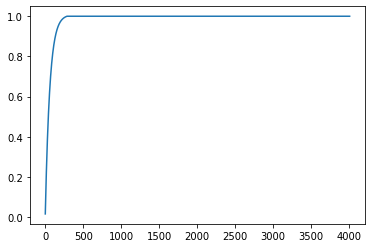

In [190]:
H=len(hit_times)

pb=pb_constant*l2*10

pbs=pb*np.exp(-np.arange(H)*pb)
print(pbs)    
cum=np.clip(np.cumsum(pbs),0,1)
#if cum[-1]<1:
#    cum=np.concatenate((cum,[1]))
print(cum)
plt.plot(cum)